In [1]:
! pip install tensorflow==1.15

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 412.3 MB 32 kB/s s eta 0:00:01�█████████▉                 | 191.8 MB 17.0 MB/s eta 0:00:13/s eta 0:00:13███████████████           | 271.7 MB 10.3 MB/s eta 0:00:14��██▍     | 339.9 MB 57.3 MB/s eta 0:00:02�██ | 399.1 MB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 57.3 MB/s eta 0:00:01        | 2.5 MB 57.3 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 51.4 MB/s eta 0:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Un

### 주의! 이 곳에서 반드시 커널을 restart시키십시오.

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
%matplotlib inline
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

In [3]:
import numpy as np

In [4]:
print(tf.__version__)

1.15.0


In [5]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [6]:
data = input_data.read_data_sets('data/fashion',one_hot=True, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [7]:
! ls -l data/fashion

total 30164
-rw------- 1 wsuser watsonstudio  4422102 Apr  2 15:24 t10k-images-idx3-ubyte.gz
-rw------- 1 wsuser watsonstudio     5148 Apr  2 15:24 t10k-labels-idx1-ubyte.gz
-rw------- 1 wsuser watsonstudio 26421880 Apr  2 15:23 train-images-idx3-ubyte.gz
-rw------- 1 wsuser watsonstudio    29515 Apr  2 15:24 train-labels-idx1-ubyte.gz


In [8]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [9]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [10]:
data.test.labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 1.0, '(Label: Ankle boot)')

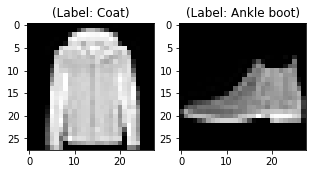

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(data.train.images[0], (28,28))
curr_lbl = np.argmax(data.train.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(data.test.images[0], (28,28))
curr_lbl = np.argmax(data.test.labels[0,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [12]:
data.train.images[0][500:]

array([0.40784317, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03921569, 0.9568628 ,
       0.8588236 , 0.9803922 , 0.80392164, 0.7803922 , 0.8196079 ,
       0.79215693, 0.8196079 , 0.82745105, 0.7411765 , 0.83921576,
       0.8078432 , 0.8235295 , 0.7843138 , 0.8313726 , 0.6039216 ,
       0.94117653, 0.81568635, 0.8588236 , 0.54901963, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08235294, 1.        , 0.8705883 , 0.9333334 ,
       0.72156864, 0.8235295 , 0.75294125, 0.8078432 , 0.8196079 ,
       0.8235295 , 0.7411765 , 0.8352942 , 0.82745105, 0.8196079 ,
       0.75294125, 0.8941177 , 0.60784316, 0.8862746 , 0.9333334 ,
       0.9450981 , 0.6509804 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14509805,
       0.9607844 , 0.8862746 , 0.9450981 , 0.5882353 , 0.7725491 ,
       0.7411765 , 0.8000001 , 0.8196079 , 0.8235295 , 0.71764

In [13]:
data.train.labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
print(np.max(data.train.images[0]))
print(np.min(data.train.images[0]))

1.0
0.0


In [15]:
# Reshape training and testing image
train_X = data.train.images.reshape(-1, 28, 28, 1)
test_X = data.test.images.reshape(-1,28,28,1)

In [16]:
train_X.shape, test_X.shape

((55000, 28, 28, 1), (10000, 28, 28, 1))

In [17]:
train_y =data.train.labels
test_y = data.test.labels

In [18]:
train_y.shape, test_y.shape

((55000, 10), (10000, 10))

In [19]:
# 하이퍼파라미터 설정
training_iters = 5
learning_rate = 0.001
batch_size = 128

In [20]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

In [21]:
#both placeholders are of type float
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

In [22]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.sigmoid(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [23]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()),
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()),
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()),
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()),
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

In [24]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.sigmoid(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term.
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [25]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [27]:
#Here, you check whether the index of the maximum value of the predicted image is equal to the actual labeled image. And both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(train_X)//batch_size):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
                # Calculate batch loss and accuracy
            opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 2.305193, Training Accuracy= 0.07031
Optimization Finished!
Testing Accuracy: 0.10000
Iter 1, Loss= 2.302926, Training Accuracy= 0.07031
Optimization Finished!
Testing Accuracy: 0.09720
Iter 2, Loss= 2.302892, Training Accuracy= 0.09375
Optimization Finished!


In [ ]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

In [ ]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

In [ ]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training Accuracy vs. Test Loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()